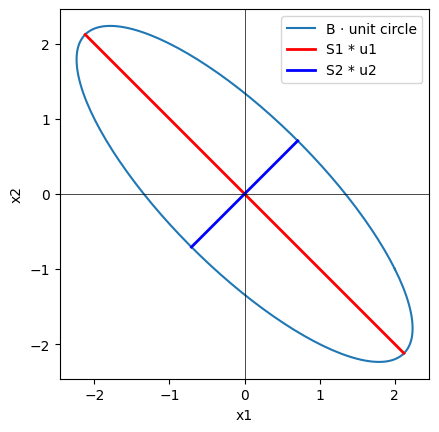

In [28]:
# Question 4b
import numpy as np
import matplotlib.pyplot as plt

# Define matrix B
B = np.array([[2, -1],
              [-1, 2]])

# Compute SVD
U, S, Vt = np.linalg.svd(B)

# Generate points on the unit circle
theta = np.linspace(0, 2 * np.pi, 200)
circle = np.vstack((np.cos(theta), np.sin(theta)))

# Transform the unit circle by B to get the ellipse
ellipse = B @ circle

# Plotting
fig, ax = plt.subplots()
# ax.plot(circle[0], circle[1], '--') 
ax.plot(ellipse[0], ellipse[1], label='B · unit circle')

# First principal semiaxis in red
u1 = U[:, 0]
s1 = S[0]
ax.plot([0, s1 * u1[0]], [0, s1 * u1[1]],
        color='red', linewidth=2, label='S1 * u1')
ax.plot([0, -s1 * u1[0]], [0, -s1 * u1[1]],
        color='red', linewidth=2)

# Second principal semiaxis in blue
u2 = U[:, 1]
s2 = S[1]
ax.plot([0, s2 * u2[0]], [0, s2 * u2[1]],
        color='blue', linewidth=2, label='S2 * u2')
ax.plot([0, -s2 * u2[0]], [0, -s2 * u2[1]],
        color='blue', linewidth=2)

# Axes settings
ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

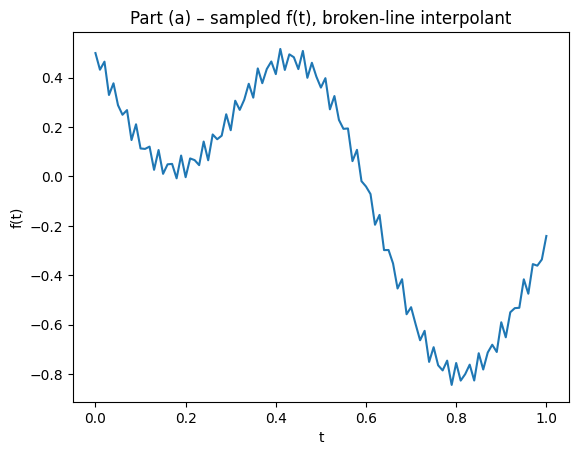

In [2]:
# (6.2a) sample the function and plot the broken-line

t = np.arange(0.00, 1.01, 0.01)
f = 0.05 * np.sin(1000 * t) + 0.5 * np.cos(np.pi * t) - 0.4 * np.sin(10 * t)

plt.figure()
plt.plot(t, f)
plt.title("Part (a) – sampled f(t), broken-line interpolant")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

# (6.2b) Selecting the polynomial degree by inspection


Because the function combines one slow, large amplitude term 0.5 cos(pi t) with two much faster, lower amplitude sine terms, the trend we care about is essentially a single broad rise and fall gently flattened near its crest and symmetric about t = 0.5. A quadratic is too rigid with no inflection points and a cubic forces asymmetry, so the lowest polynomial that can reproduce is at a degree of 4, having two inflection points. 




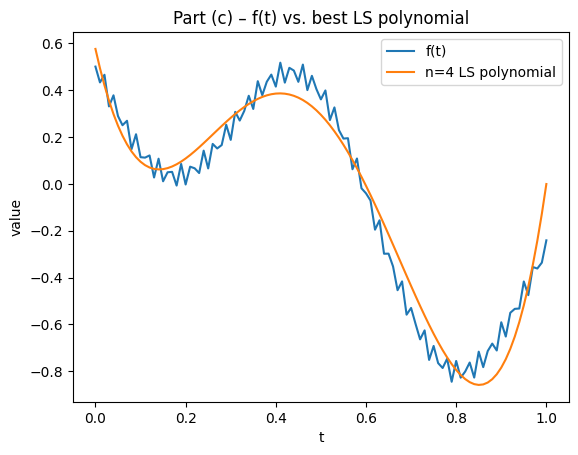

Polynomial coefficients (highest power first):
 [ 44.07824365 -82.36317962  46.37940213  -8.67077401   0.57543731]


In [4]:
# (6.2c) least-squares polynomial fit of degree n
n = 4
coeffs = np.polyfit(t, f, n)
v = np.polyval(coeffs, t)

plt.figure()
plt.plot(t, f, label="f(t)")
plt.plot(t, v, label=f"n={n} LS polynomial")
plt.title("Part (c) – f(t) vs. best LS polynomial")
plt.xlabel("t")
plt.ylabel("value")
plt.legend()
plt.show()

print("Polynomial coefficients (highest power first):\n", coeffs)
